<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 1. Importar Librerías

In [232]:
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocesamiento y análisis de texto
from spacy.lang.es.stop_words import STOP_WORDS  # stopwords
import re
import stanza
from stanza import Pipeline

# Vectorizadores
from sklearn.feature_extraction.text import CountVectorizer

# LDA y document term matrix
from gensim import corpora
import gensim
from gensim.models import CoherenceModel

# Inicializar el pipeline de Stanza para español
stanza.download("es")
nlp = Pipeline(lang="es", processors="tokenize,mwt,pos,lemma")

2024-02-08 17:59:46 INFO: Downloading default packages for language: es (Spanish) ...
2024-02-08 17:59:47 INFO: File exists: C:\Users\Nicolas\stanza_resources\es\default.zip


2024-02-08 17:59:50 INFO: Finished downloading models and saved to C:\Users\Nicolas\stanza_resources.
2024-02-08 17:59:50 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-02-08 17:59:51 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-02-08 17:59:51 INFO: Using device: cpu
2024-02-08 17:59:51 INFO: Loading: tokenize
2024-02-08 17:59:51 INFO: Loading: mwt
2024-02-08 17:59:51 INFO: Loading: pos
2024-02-08 17:59:51 INFO: Loading: lemma
2024-02-08 17:59:51 INFO: Done loading processors!


## 2. Análisis Exploratorio

En este a partado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [233]:
tweets_df = pd.read_csv("data/davivienda_tweets.csv", encoding="utf-8")
print("Numero de tweets: ", tweets_df.shape[0])
print("Numero de variables: ", tweets_df.shape[1])
tweets_df.head(5)

Numero de tweets:  1811
Numero de variables:  12


,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...


### Limpieza de datos

Los datos crudos a menudo contienen errores, valores faltantes, duplicados, o formatos inconsistentes. La limpieza ayuda a corregir estos problemas, asegurando que el análisis se realice sobre datos precisos y fiables.

#### Eliminar columnas sin valor semántico

In [234]:
# eliminar columna sin nombre, es un consecutivo
tweets_df.drop(["Unnamed: 0"], axis=1, inplace=True)

# eliminar URL's de los tweets y image links, no contribuyen al significado del texto
tweets_df.drop(["Tweet URL"], axis=1, inplace=True)
tweets_df.drop(["Image link"], axis=1, inplace=True)

# Eliminar los emojis, pueden ser utilizados para clasificar el sentimiento de un tweet pero no se utilizaran en este caso. Además, cuenta con muchos valores nulos
tweets_df.drop(["Emojis"], axis=1, inplace=True)

In [235]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserScreenName  1807 non-null   object 
 1   UserName        1811 non-null   object 
 2   Timestamp       1811 non-null   object 
 3   Text            1811 non-null   object 
 4   Embedded_text   1811 non-null   object 
 5   Comments        838 non-null    float64
 6   Likes           247 non-null    object 
 7   Retweets        643 non-null    object 
dtypes: float64(1), object(7)
memory usage: 113.3+ KB


In [236]:
# Imprimir el total de valores NaN en cada columna
total_nan_por_columna = tweets_df.isnull().sum()
print("Total de valores NaN por columna:")
print(total_nan_por_columna)

Total de valores NaN por columna:
UserScreenName       4
UserName             0
Timestamp            0
Text                 0
Embedded_text        0
Comments           973
Likes             1564
Retweets          1168
dtype: int64


#### Imputación de variables numéricas

In [237]:
# Imputación por un valor constante (por ejemplo, 0)
tweets_df["Likes"] = tweets_df["Likes"].fillna(0)
tweets_df["Retweets"] = tweets_df["Retweets"].fillna(0)
tweets_df["Comments"] = tweets_df["Comments"].fillna(0)


# convertir el tipo de dato de las columnas a numerico, por naturaleza tweeter abrevia los numeros de comentarios, likes y retweets con "mil",
# para poder convertir a numerico se debe eliminar el "mil", multiplicar por 1000 y convertir a numerico
def convertir_a_numero(valor):
    if isinstance(valor, str):
        valor = valor.replace(
            ",", "."
        )  # Reemplazar coma por punto para manejar decimales
        if "mil" in valor:
            valor = valor.replace("mil", "").strip()
            return int(float(valor) * 1000)  # Convertir a float primero y luego a int
        else:
            return int(float(valor))
    else:
        return int(valor)

tweets_df["Likes"] = tweets_df["Likes"].apply(convertir_a_numero)
tweets_df["Retweets"] = tweets_df["Retweets"].apply(convertir_a_numero)
tweets_df["Comments"] = tweets_df["Comments"].apply(convertir_a_numero)

#### Imputación valores faltantes UserScreenName 

In [238]:
# Para el caso en el que existan NaN en la columna de UserScreenName se imputará con el valor de la columna UserName
tweets_df["UserScreenName"] = tweets_df["UserScreenName"].fillna(tweets_df["UserName"])

#### Registros duplicados

In [239]:
total_duplicados = tweets_df.duplicated().sum()
print(f"Total de duplicados en el DataFrame: {total_duplicados}")

Total de duplicados en el DataFrame: 0


#### Resultado de limpieza

In [240]:
tweets_df.describe()

,Comments,Likes,Retweets
count,1811.000000,1811.000000,1811.000000
mean,0.699613,1.838763,3.790171
std,2.735140,41.178703,66.864662
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,87.000000,1500.000000,2500.000000


In [241]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  1811 non-null   object
 1   UserName        1811 non-null   object
 2   Timestamp       1811 non-null   object
 3   Text            1811 non-null   object
 4   Embedded_text   1811 non-null   object
 5   Comments        1811 non-null   int64 
 6   Likes           1811 non-null   int64 
 7   Retweets        1811 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 113.3+ KB


In [242]:
tweets_df.head(10)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Comments,Likes,Retweets
0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,1,7,19
1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,0,0,0
2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,1,0,1
3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,2,1,2
4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,3,0,8
5,John Jairo Peralta Bernal,@JohnJairoPe,2021-12-01T16:11:03.000Z,John Jairo Peralta Bernal\n@JohnJairoPe\n·\n1 ...,"Open Data, CEO, pregúntele a la gente de a pie...",0,1,0
6,Universidad El Bosque,@U_ElBosque,2021-12-01T15:00:26.000Z,Universidad El Bosque\n@U_ElBosque\n·\n1 dic.,Conoce los requisitos de la convocatoria de Be...,0,0,0
7,Cristian Julian,@cjulianlozano,2021-12-01T00:01:49.000Z,Cristian Julian\n@cjulianlozano\n·\n30 nov.,Mamado de ser adulto y tener que trabajar para...,0,0,0
8,Santiago Parra Angel,@SantiagoParraA2,2021-12-01T01:31:18.000Z,Santiago Parra Angel\n@SantiagoParraA2\n·\n30 ...,"#daviplata ayuda por favor, llevo más de 3 mes...",0,0,1
9,Andres Moreno Jaramillo,@andresmania,2021-12-01T04:27:27.000Z,Andres Moreno Jaramillo\n@andresmania\n·\n30 nov.,"Cierto, recuerdo en 2000-2010 se vendieron emp...",1,1,6


#### Análisis de usuarios con mayor número de tweets

In [243]:
# Identificando los usuarios que más tweets hicieron
users_tweet_counts = tweets_df['UserName'].value_counts().reset_index()
users_tweet_counts.columns = ['UserName', 'TweetCount']

# Mostrando los top usuarios que más tweets hicieron
top_users = users_tweet_counts.head(10)
top_users

,UserName,TweetCount
0,@Davivienda,245
1,@CNOGUERA20,41
2,@davicorredores,23
3,@Edimejia1979,9
4,@Juanma7725,8
5,@FabioFernandoH1,7
6,@DaviEscucha,7
7,@dataiFX,7
8,@Joacoro,6
9,@EnriqueDelgadoP,6


Con el fin de mejorar la calidad del análisis, se eliminarán los tweets que provengan del perfil de "@Davivienda", "@DaviEscucha" y en su contenido se encuentren las palabras "En respuesta" debido a que en su mayoría son tweets de sopoerte para los usuarios. Estos tweets no aportan al análisis, debido a que invitan al usuario a comunicarse con el banco para resolver sus inquietudes.

In [244]:
tweets_df = tweets_df[
    ~(
        (tweets_df["UserName"].str.contains("@Davivienda", case=False))
        & (tweets_df["Embedded_text"].str.contains("En respuesta", case=False))
    )
]

tweets_df = tweets_df[
    ~(
        (tweets_df["UserName"].str.contains("@DaviEscucha", case=False))
        & (tweets_df["Embedded_text"].str.contains("En respuesta", case=False))
    )
]

#### Análisis de interacciones por día

<Figure size 1400x700 with 0 Axes>

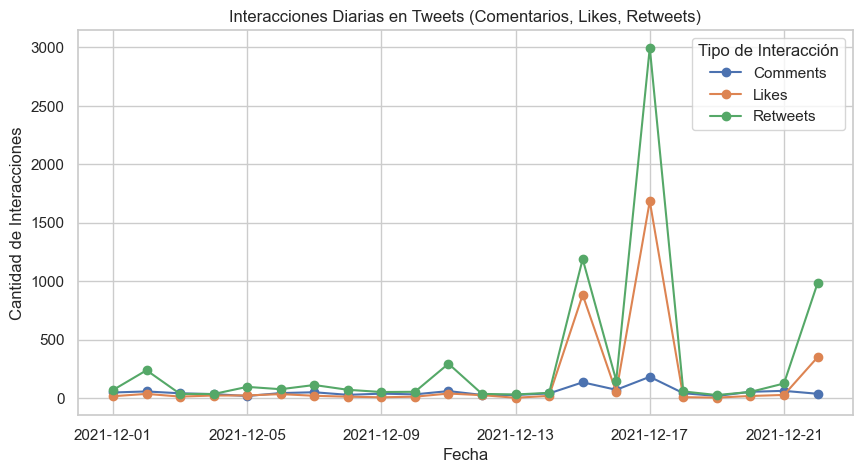

In [245]:
# Convertir la columna Timestamp a datetime
tweets_df['Timestamp'] = pd.to_datetime(tweets_df['Timestamp'])

# Crear una nueva columna con solo la fecha
tweets_df['Date'] = tweets_df['Timestamp'].dt.date

# Agrupar por fecha y sumar las interacciones
daily_interactions = tweets_df.groupby('Date').agg({'Comments':'sum', 'Likes':'sum', 'Retweets':'sum'})

# Visualizar las interacciones diarias
plt.figure(figsize=(14, 7))
daily_interactions.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Interacciones Diarias en Tweets (Comentarios, Likes, Retweets)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Interacciones')
plt.grid(True)
plt.legend(title='Tipo de Interacción')
plt.show()


<Figure size 1400x700 with 0 Axes>

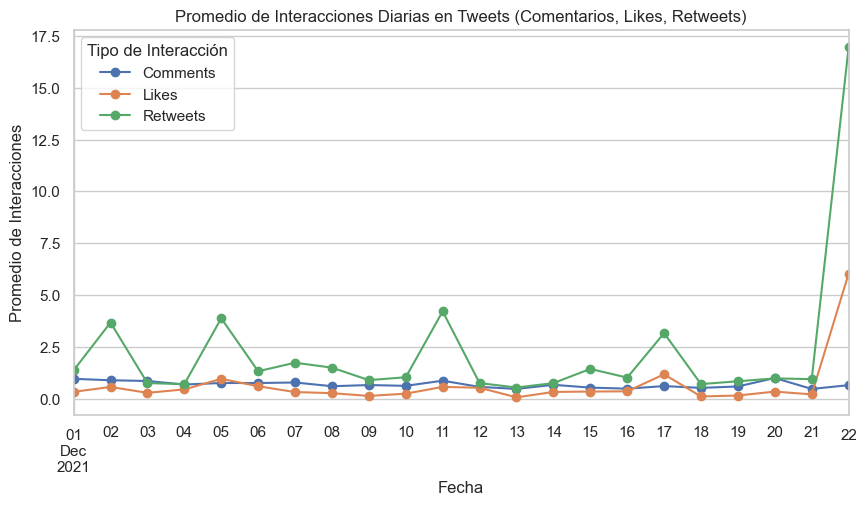

In [246]:
# Obtener el promedio de interacciones por dia excluyendo los picos altos
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])
tweets_df.set_index('Date', inplace=True)

# Filtrar los tweets que tienen más de 1000 interacciones
tweets_df = tweets_df[tweets_df['Retweets'] < 1000]

# Agrupar por fecha y calcular el promedio de interacciones
daily_avg_interactions = tweets_df.groupby('Date').agg({'Comments':'mean', 'Likes':'mean', 'Retweets':'mean'})

# print(daily_avg_interactions)

# Visualizar el promedio de interacciones diarias
plt.figure(figsize=(14, 7))
daily_avg_interactions.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Promedio de Interacciones Diarias en Tweets (Comentarios, Likes, Retweets)')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Interacciones')
plt.grid(True)
plt.legend(title='Tipo de Interacción')
plt.show()


Los resultados muestran un bajo nivel de interacciones(Comentarios, Likes, Retweets) por día en el periodo de muestra correspondiente al mes de diciembre del 2021. Sin embargo, se grafican dos picos representativos los cuales fueron los días 15 de diciembre y 17 de diciembre de 2021, los cuales fueron excluidos para obtener el promedio pues pueden considerarse como días atípicos, resultando un valor no mayor a 12 interacciones promedio por día, especialmente de Retweets.

Esta es una característica común de los datos de redes sociales, donde algunos contenidos se vuelven virales mientras que la mayoría permanece con bajo nivel de interacción.

#### Distribución de la Longitud de los Textos de los Tweets

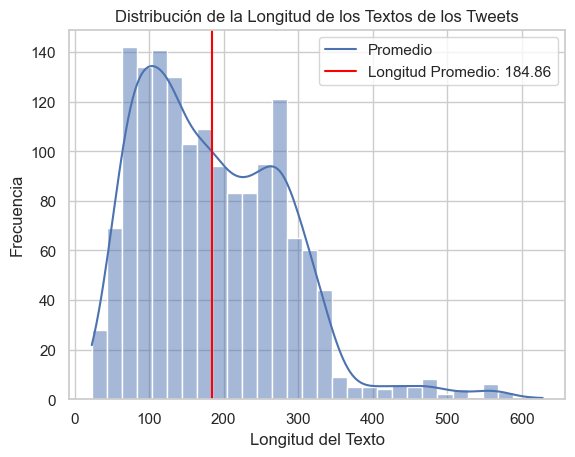

In [247]:
# Configuración básica para los gráficos
sns.set(style="whitegrid")

# Análisis de la longitud del texto de los tweets
tweets_df["text_length"] = tweets_df["Embedded_text"].apply(len)

# Distribución de la longitud de los textos
# plt.figure(figsize=(10, 6))
sns.histplot(tweets_df["text_length"], bins=30, kde=True)
plt.axvline(x=np.mean(tweets_df["text_length"]), color="red")
plt.title("Distribución de la Longitud de los Textos de los Tweets")
plt.xlabel("Longitud del Texto")
plt.ylabel("Frecuencia")
plt.legend(["Promedio", f"Longitud Promedio: {np.mean(tweets_df['text_length']):.2f}"])
plt.show()

La mayoría de los tweets tienen una longitud de texto concentrada entre 0 y 300 caracteres con una longitud promedio de 184 caracteres, lo que es esperado dada la naturaleza concisa de los tweets. Existe una distribución relativamente normal con una cola hacia la derecha, indicando la presencia de algunos tweets más largos.

## 3. Prepocesamiento de Texto

#### Explorando el contenido del tweet

In [248]:
## Mira los primeros 10 tweets como muestra
tweets_df.Embedded_text.to_list()[0:5]

['La confianza se afectó. El indicador de confianza Davivienda tuvo una  leve caída en noviembre, rompiendo una tendencia de cinco meses de mejoras. El indicador se deterioró, especialmente en la última semana del mes, asociado al aumento en la tasa de cambio.\n1\n7\n19',
 'Buscamos la accesibilidad y mejor atención en tus trámites bancarios, es por ello que encuentras en nuestra plaza los siguientes bancos para tu preferencia.\n Banco Cuscatlán\n Banco Fedecrédito\n Davivienda\n Bancoagrícola\n Banco Promerica',
 'Señores \n@Davivienda\n no he podido ingresar a mi app davivienda, ingreso la cédula y me dice verifique los datos, llevo así varios días.\n1\n1',
 'Llevo toda una semana sufriendo intento de hurto por medios electrónicos a mi cuenta de ahorros \n@Davivienda\n, sin que se puedan realizar porque no tengo plata. No felices, lo hicieron con la TC y con esta sí pudieron ya que tenía cupo libre. ¿Qué está pasando \n@Davivienda\n?\n2\n1\n2',
 'Hemos retrocedido tanto en este país 

#### Función para el preprocesamiento de tweets

In [249]:
# Agregar palabras adicionales a la lista de stopwords
NEW_STOP_WORDS = {
    "davivienda",
    "daviviendo",
    "mostrar",
    "hilo",
    "respuesta",
    "respondiendo",
    "responder",
    "banco",
    "lunes",
    "martes",
    "miércoles",
    "jueves",
    "viernes",
    "sábado",
    "domingo",
    "hola",
}
STOP_WORDS.update(NEW_STOP_WORDS)

In [250]:
# def preprocess_tweets(text):
#     text = text.lower()  # Convertir a minúsculas
#     text = re.sub("\[.*?\]", "", text)  # Remover texto entre corchetes
#     text = re.sub("https?://\S+|www\.\S+", "", text)  # Remover URLs
#     text = re.sub("<.*?>+", "", text)  # Remover HTML
#     text = re.sub("\n", " ", text)  # Remover saltos de línea
#     text = re.sub(r"\W+", " ", text)  # Remover puntuación y caracteres especiales
#     text = re.sub(r"\b\w{1,3}\b", "", text)  # Remover palabras de 3 letras o menos

#     # Tokenización y lematización con spaCy
#     doc = nlp(text)

#     lemmas = [
#         token.lemma_
#         for token in doc
#         if token.text not in STOP_WORDS and not token.is_punct
#     ]


#     return " ".join(lemmas)  # , " ".join(stems)

In [251]:
def preprocess_tweets_stanza(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r"\[.*?\]", "", text)  # Remover texto entre corchetes
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remover URLs
    text = re.sub(r"<.*?>+", "", text)  # Remover HTML
    text = re.sub(r"\n", " ", text)  # Remover saltos de línea
    text = re.sub(r"\W+", " ", text)  # Remover puntuación y caracteres especiales
    text = re.sub(r"\b\w{1,3}\b", "", text)  # Remover palabras de 3 letras o menos

    # Procesamiento con Stanza
    doc = nlp(text)

    # Filtrar stop words y puntuación y obtener lemas
    lemmas = [
        word.lemma
        for sentence in doc.sentences
        for word in sentence.words
        if not word.lemma in STOP_WORDS
    ]

    return " ".join(lemmas)

Se decide lematizar las palabras en lugar de hacerles un estematización, ya que la lematización considera la estructura y propiedades gramaticales de las palabras y las convierte a una forma base, mientras que la estematización es una técnica que se utiliza para reducir una palabra hasta la raíz de la palabra. Esto puede resultar en raíces que no son realmente palabras reales. Por lo tanto, la lematización es mejor para la modelización de temas ya que conserva el significado semántico de las palabras. Sin embargo, computacionalmente, es más costoso.

In [252]:
tweets_df["Embedded_text_cleaned"] = tweets_df["Embedded_text"].apply(
    lambda x: preprocess_tweets_stanza(x)
)  # Para lemas

In [253]:
tweets_df.head(5)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Comments,Likes,Retweets,text_length,Embedded_text_cleaned
Date,,,,,,,,,,
2021-12-01,Andrés Langebaek,@ALangebaek,2021-12-01 20:43:12+00:00,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,1,7,19,265,confianza afectar indicador confianza leve caí...
2021-12-01,Plaza Futura,@plaza_futura,2021-12-01 21:18:10+00:00,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,0,0,0,236,buscar accesibilidad atención trámite bancario...
2021-12-01,Julián Martinez,@JulianM998,2021-12-01 22:49:11+00:00,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,1,0,1,140,señor ingresar ingreso cédula verificar dato
2021-12-01,Ferchis.,@fergomezr28,2021-12-01 12:29:07+00:00,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,2,1,2,281,semana sufrir intento hurto electrónico contar...
2021-12-01,MirandaL2,@MirandaSuspLo,2021-12-01 20:52:36+00:00,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,3,0,8,193,retroceder país gobierno malparido cajero dizc...


In [254]:
# guardar el dataframe limpio
tweets_df.to_csv("data/davivienda_tweets_cleaned_stanza.csv", index=False, encoding="utf-8")

### Análisis de N-grams

Para analizar el contenido de cada tweet se opta por extraer las características de N-gramas.

Los N-gramas se utilizan para describir el número de palabras utilizadas como puntos de observación, por ejemplo, unigrama significa una sola palabra, bigrama significa una frase de 2 palabras y trigrama significa una frase de 3 palabras.

#### Distribución de los unigramas principales

In [255]:
# source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    """
    Lista las n palabras principales de un vocabulario según su aparición en un corpus de texto.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

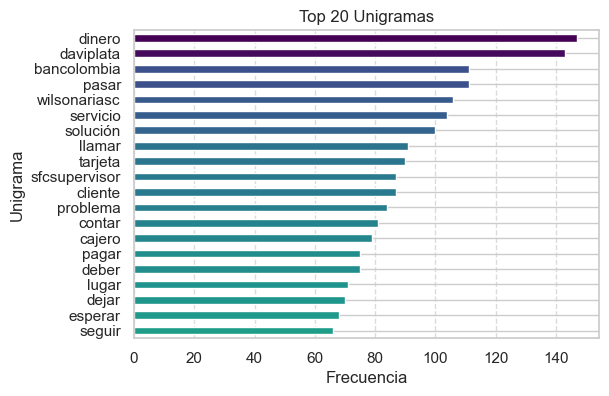

In [256]:
# Obtener los 20 unigramas más comunes
pos_unigrams = get_top_n_words(tweets_df['Embedded_text_cleaned'], 20)

# Crear un dataframe a partir de los resultados
df1 = pd.DataFrame(pos_unigrams, columns=['Text', 'count'])

# Agrupar y sumar los conteos de cada unigrama, luego ordenarlos
counts = df1.groupby('Text').sum()['count'].sort_values(ascending=True)

# Colores personalizados para las barras
colors = plt.cm.viridis_r(counts / float(max(counts)))

# Crear el gráfico de barras utilizando Matplotlib
plt.figure(figsize=(6, 4))
counts.plot(kind='barh', color=colors)
plt.xlabel('Frecuencia')
plt.ylabel('Unigrama')
plt.title('Top 20 Unigramas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Distribución de los bigramas principales

In [257]:
def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

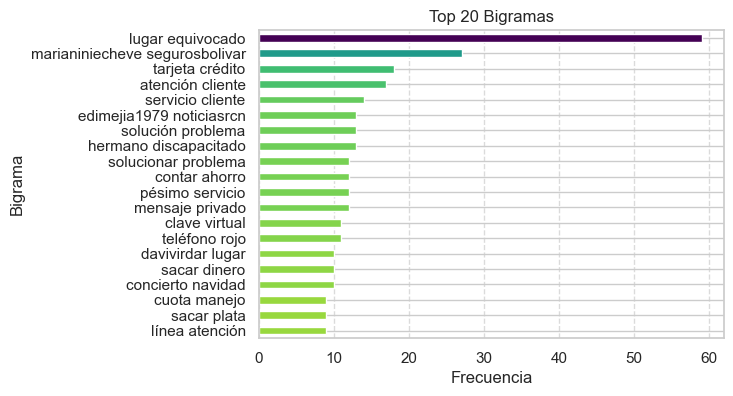

In [258]:
# Obtener los 20 unigramas más comunes
pos_bigrams = get_top_n_gram(tweets_df["Embedded_text_cleaned"], (2, 2), 20)

# Crear un dataframe a partir de los resultados
df1 = pd.DataFrame(pos_bigrams, columns=["Text", "count"])

# Agrupar y sumar los conteos de cada unigrama, luego ordenarlos
counts = df1.groupby("Text").sum()["count"].sort_values(ascending=True)

# Colores personalizados para las barras
colors = plt.cm.viridis_r(counts / float(max(counts)))

# Crear el gráfico de barras utilizando Matplotlib
plt.figure(figsize=(6, 4))
counts.plot(kind="barh", color=colors)
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.title("Top 20 Bigramas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Distribución de los trigramas principales

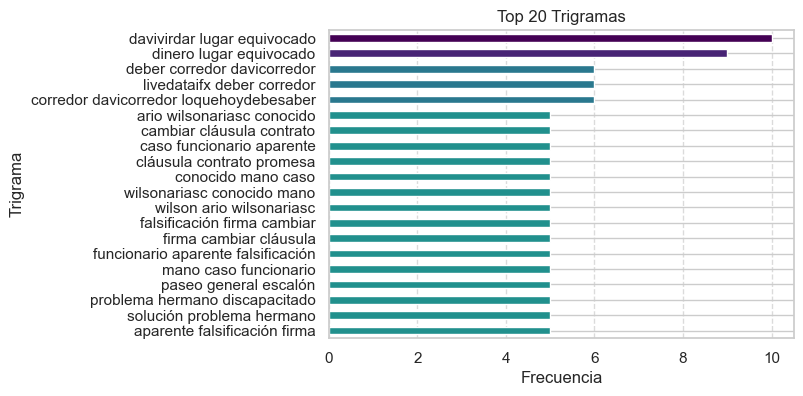

In [259]:
# Obtener los 20 unigramas más comunes
pos_trigrams = get_top_n_gram(tweets_df["Embedded_text_cleaned"], (3, 3), 20)

# Crear un dataframe a partir de los resultados
df1 = pd.DataFrame(pos_trigrams, columns=["Text", "count"])

# Agrupar y sumar los conteos de cada unigrama, luego ordenarlos
counts = df1.groupby("Text").sum()["count"].sort_values(ascending=True)

# Colores personalizados para las barras
colors = plt.cm.viridis_r(counts / float(max(counts)))

# Crear el gráfico de barras utilizando Matplotlib
plt.figure(figsize=(6, 4))
counts.plot(kind="barh", color=colors)
plt.xlabel("Frecuencia")
plt.ylabel("Trigrama")
plt.title("Top 20 Trigramas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 4. WordClouds o Nubes de Palabras
Las nubes de palabras dan una idea de las palabras que pueden influir en la polaridad del tuit.

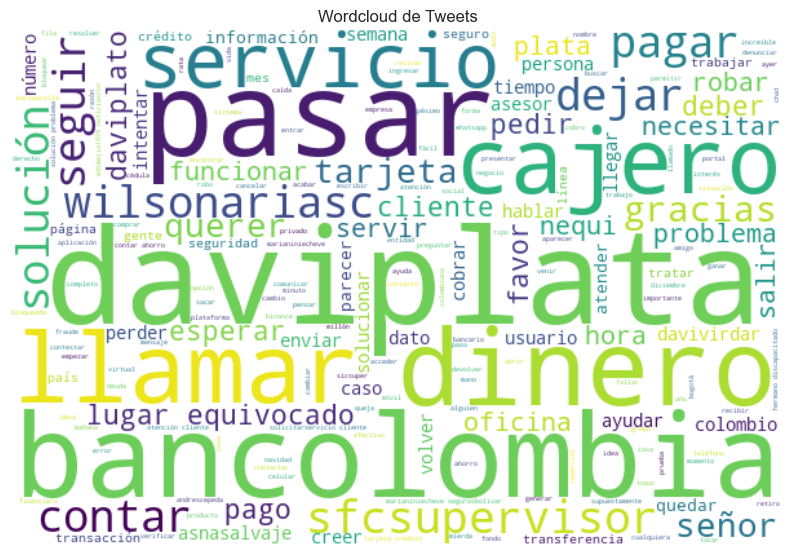

In [260]:
# Crear el wordcloud
wordcloud1 = WordCloud(background_color="white", width=600, height=400).generate(" ".join(tweets_df["Embedded_text_cleaned"]))

# Mostrar el wordcloud utilizando Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud de Tweets')
plt.show()

## Matriz termino-documento - Document-Term Matrix

La matriz termino documento crea una matriz para representar el documento Cada columna representa una palabra del vocabulario construido a partir del corpus. Donde el valor de cada celda es el recuento de la palabra correspondiente en el documento correspondiente

In [261]:
# Crear diccionario y corpus para LDA
tweets_df['tokens'] = tweets_df["Embedded_text_cleaned"].apply(lambda x: x.split())

# Crear el diccionario a partir de los tokens
diccionario = corpora.Dictionary(tweets_df['tokens'])

# Crear el corpus a partir del diccionario
corpus = [diccionario.doc2bow(text) for text in tweets_df['tokens']]

In [262]:
# Convertir cada documento en un diccionario de frecuencias de términos
data = []
for doc in corpus:
    doc_dict = {diccionario[id]: freq for id, freq in doc}
    data.append(doc_dict)

# Crear el DataFrame a partir de la lista de diccionarios
dtm_df = pd.DataFrame(data).fillna(0)

dtm_df.head()

,afectar,asociado,aumento,cambio,caída,confianza,deteriorar,especialmente,indicador,leve,...,enormemente,capacitado,ginaa1931,gleniiaaa,codo,elegido,nicodiazgr,proporción,selección,trabajir
0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [263]:
# establecer parametros para el modelo LDA
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = 1

# Aplicar modelo LDA
lda_model_tuning = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=diccionario,
    chunksize=chunksize,
    alpha="auto",
    eta="auto",
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
)

# Visualizar los tópicos
lda_model_tuning.print_topics()



[(0,
  '0.020*"asnasalvaje" + 0.016*"tarjeta" + 0.009*"dinero" + 0.009*"llamar" + 0.008*"wilsonariasc" + 0.008*"contar" + 0.007*"robar" + 0.006*"querer" + 0.006*"dejar" + 0.006*"bancolombia"'),
 (1,
  '0.015*"wilsonariasc" + 0.012*"marianiniecheve" + 0.010*"deber" + 0.009*"contar" + 0.009*"segurosbolivar" + 0.009*"navidad" + 0.008*"dinero" + 0.008*"daviplata" + 0.007*"dejar" + 0.007*"nequi"'),
 (2,
  '0.011*"pasar" + 0.011*"wilsonariasc" + 0.009*"página" + 0.009*"servicio" + 0.007*"millón" + 0.007*"bancolombia" + 0.007*"dinero" + 0.007*"lugar" + 0.007*"asnasalvaje" + 0.006*"tarjeta"'),
 (3,
  '0.024*"dinero" + 0.009*"daviplata" + 0.007*"pasar" + 0.007*"necesitar" + 0.006*"pagar" + 0.006*"ayudar" + 0.006*"seguir" + 0.005*"llegar" + 0.005*"equivocado" + 0.005*"lugar"'),
 (4,
  '0.018*"bancolombia" + 0.014*"lugar" + 0.014*"equivocado" + 0.010*"davivirdar" + 0.007*"seguir" + 0.006*"pasar" + 0.005*"plata" + 0.005*"cliente" + 0.005*"llamar" + 0.005*"pago"'),
 (5,
  '0.013*"binance" + 0.009*"

In [264]:
# Calcular la coherencia del modelo LDA
coherence_model_ldamallet = CoherenceModel(
    model=lda_model_tuning, texts=tweets_df["tokens"], dictionary=diccionario, coherence="c_v"
)
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print("\nCoherence Score: ", coherence_ldamallet)


Coherence Score:  0.33265228936627517


#### ¿Cómo decidir correctamente el número de temas? Modelo de coherencia

Se clasifica lo bien que se ha hecho el modelado de temas viendo si la similitud semántica entre las palabras principales (por tema) es alta. Para esto se utiliza el CoherenceModel de gensim para que nos ayude a ajustar los hiperparámetros.

Probaremos con un mínimo de 5 temas, hasta unos 25.

#### Construcción de modelos LDA y búsqueda del mejor número de temas

In [265]:
coherence_scores = []
## RANGE OF NUMBER OF TOPICS TO CHOOSE FROM
k_values = np.arange(6, 26, 2)

for k in k_values:
    lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=diccionario,
        num_topics=k,
        random_state=42,
        passes=10,
        workers=4,
    )

    coherence_model = CoherenceModel(
        model=lda_model,
        texts=tweets_df["tokens"],
        dictionary=diccionario,
        coherence="c_v",
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

## Print results
print(coherence_scores)

[0.3166568422459171, 0.32873835131840773, 0.3519463413701512, 0.333399645311238, 0.3364002742722887, 0.35287276356919023, 0.34176021084716895, 0.3539082023034465, 0.3666149662065981, 0.3738810510290092]


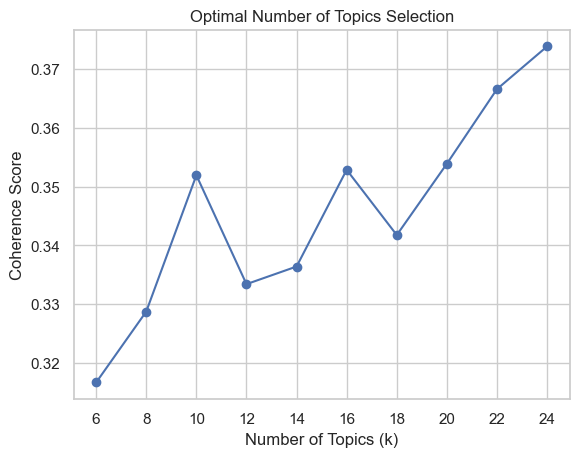

In [266]:
plt.plot(k_values, coherence_scores, marker = 'o')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics Selection')
plt.xticks(k_values)
plt.show()

## 7. Interpretación de Resultados y conclusiones generales.

Ahora que el modelo LDA está listo, el siguiente paso es examinar los temas producidos y las palabras clave asociadas. La herramienta que se escoge es el gráfico interactivo del paquete pyLDAvis. Donde cada burbuja del gráfico de la izquierda representa un tema. Cuanto más grande es la burbuja, mayor es la prevalencia de ese tema.  El gráfico de barras horizontales de la derecha representa las palabras más relevantes de cada tema. El gráfico es interactivo, lo que permite seleccionar temas específicos y ver las palabras relacionadas con cada tema, con la esperanza de inferir el significado de cada tema.

In [267]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preparar la visualización
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_tuning, corpus, diccionario)
pyLDAvis.display(vis)


Aunque anteriormente mediante el calculo de coherencia de los tópicos se obtuvo que el número óptimo de tópicos es 16, se procedió a realizar el modelo con 10 tópicos.
Esto debido a que el modelo con 16 tópicos no es interpretable y no se logra identificar un tema claro en cada tópico.
Adicionalmente, del modelo de 10 tópicos se puede interpretar que:

- Tópico 1: "Problemas con la app de Daviviplata"
- Tópico 2: "Problemas con las transferencias de dinero cuentas Davivienda a otros bancos"
- Tópico 3 y 4: "Publicaciones a modo de queja de usuarios con un numero considerable de seguidoers"
- Tópico 5 y 10: "Problemas con el servicio al cliente, tarjetas y cajeros"
- Tópico 6: "Piloto con la plataforma de Binance y Davivienda"
- Tópico 7: "Referencias a Davivienda utilizando la famosa frase de “En estos momentos su dinero puede estar en el lugar equivocado, tráigalo a Davivienda”
- Tópico 8: "Problemas con el dinero de los clientes y daviplata"
- Tópico 9: "Publicaciones para reportar fraude o estafa por parte de usuario con un numero considerable de seguidoers"

En general, se evidencia que la mayoría de los usuarios utilizan la plataforma de Twitter para reportar problemas con la app de Daviviplata, problemas con las transferencias de dinero a otros bancos, problemas con el servicio al cliente, tarjetas y cajeros, y publicaciones a modo de queja de usuarios con un numero considerable de seguidoers. Adicionalmente, se evidencia que algunos usuarios utilizan la plataforma para reportar fraude o estafa.

Se probaron distintos métodos de agrupación y búsqueda de temas subyacentes a partir de los tweets del conjunto de datos, como el modelado de temas LDA. Además, se exploraron formas de visualizar los resultados y de compararlos con los temas originales de los tweets.

Sin embargo, probablemente debido a la propia naturaleza del texto (por ejemplo, los tweet son demasiado similares en general, o tienen muy pocas palabras para permitirnos segmentar el tema subyacente), acabamos con algunas distinciones borrosas entre cada tema, como se ve en las palabras principales por cada tópico tras el modelado LDA.